# Logistic Regression

### logistic regression을 tensorflow로 구현하여 여러 차원 데이터의 분류를 해보고자 한다.

In [83]:
##tenssorflow==2.3 환경에서 구현  
import tensorflow as tf
import numpy as np
# weigh와 bias 변수 설정
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))
#2D 데이터에서 특정 직선 이상의 값은 1,이하는 0인 데이터
label_x=np.array([[2,1],[3,1],[4,3],[6,5],[8,4],[11,8],[13,8],[14,9],[15,10]],dtype=np.float32) #input data
label_y=np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1]],dtype=np.float32) #output data 

[ 2.  3.  4.  6.  8. 11. 13. 14. 15.]


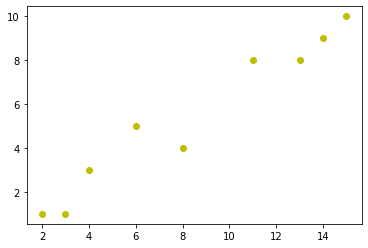

In [84]:
import matplotlib.pyplot as plt
t=label_x[:,0]
print(t)
c=label_x[:,1]
plt.plot(t,c, 'yo', label='y=0 value')
plt.show()

In [85]:
#loss function 정의
def loss_function():
#sigmoid function으로 pred_y값을 도출하고 cross entropy loss를 loss function으로 loss 값도출
  z= tf.matmul(label_x,w)+b
  pred_y = tf.sigmoid(z)
  cost = -tf.reduce_mean(label_y * tf.math.log(pred_y) + (1 - label_y) * tf.math.log(1 - pred_y))#cross entropy loss를 loss function으로 활용
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용

for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w.numpy()[0], w.numpy()[1], 'bias:', b.numpy()[0])

0 loss_value: 2.2123218 weight: [0.5910273] [0.2415994] bias: 0.53903186
100 loss_value: 0.6017504 weight: [0.1718874] [-0.12260365] bias: -0.19914189
200 loss_value: 0.4794584 weight: [0.1644548] [-0.01206788] bias: -0.8255329
300 loss_value: 0.38431287 weight: [0.15397643] [0.09465483] bias: -1.4322892
400 loss_value: 0.3150078 weight: [0.14659132] [0.189735] bias: -1.9871627
500 loss_value: 0.2643682 weight: [0.14317004] [0.27135983] bias: -2.4904025
600 loss_value: 0.22638161 weight: [0.14338264] [0.34099975] bias: -2.9497838
700 loss_value: 0.1970048 weight: [0.14652796] [0.40087187] bias: -3.373388
800 loss_value: 0.17364205 weight: [0.15188937] [0.4530545] bias: -3.767897
900 loss_value: 0.15461451 weight: [0.15885195] [0.49926338] bias: -4.1385145
1000 loss_value: 0.13880828 weight: [0.16692522] [0.54084736] bias: -4.4892464
1100 loss_value: 0.12546149 weight: [0.1757335] [0.5788446] bias: -4.8231974
1200 loss_value: 0.11403712 weight: [0.18499689] [0.6140463] bias: -5.142807
1

In [86]:
#최종 train accuracy 측정
pred_y = tf.sigmoid(tf.matmul(label_x,w)+b)
pred_final = tf.cast(pred_y > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,label_y),dtype=tf.float32))
print("accuracy:", accuracy.numpy())
print(pred_final)

accuracy: 1.0
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(9, 1), dtype=float32)


## predict

In [87]:
#test data 설정 및 학습한 모델로 predict
test_x=np.array([[6,4],[12,6]],dtype=np.float32) 
test_y=np.array([[0],[1]],dtype=np.float32)

test_pred= tf.sigmoid(tf.matmul(test_x,w)+b)
test_pred_final= tf.cast(test_pred > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

accuracy: 1.0


## plot result

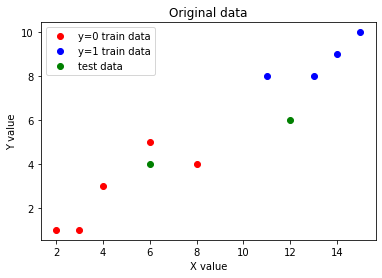

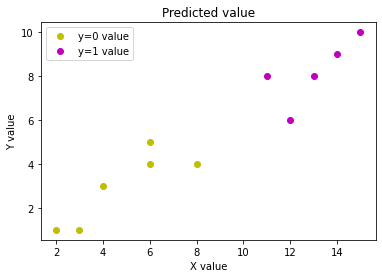

In [92]:
import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)
#label_x,test_x 데이터에서 x축, y축 데이터 분리
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]

test_x_x1=test_x[:,0]
test_x_y1=test_x[:,1]

#시각화를 위해 label y가 0인 데이터와 1인 데이터를 분리한 후, 결과 plot
label_y=np.squeeze(label_y)
test_pred_final=np.squeeze(test_pred_final)
pred_final=np.squeeze(pred_final)

label_x_x1_0=label_x_x1[label_y==0] 
label_x_x1_1=label_x_x1[label_y==1]
label_x_y1_0=label_x_y1[label_y==0] 
label_x_y1_1=label_x_y1[label_y==1]
# original data plot
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='y=0 train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='y=1 train data')
plt.plot(test_x_x1, test_x_y1,'go', label='test data')
plt.legend()
plt.show()


pred_x_x1_0=label_x_x1[pred_final==0] 
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_y1_0=label_x_y1[pred_final==0] 
pred_x_y1_1=label_x_y1[pred_final==1]

pred_test_x_x1_0=test_x_x1[test_pred_final==0]
pred_test_x_x1_1=test_x_x1[test_pred_final==1]
pred_test_x_y1_0=test_x_y1[test_pred_final==0]
pred_test_x_y1_1=test_x_y1[test_pred_final==1]

# preidicted value plot
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'yo', label='y=0 value')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='y=1 value')
plt.plot(pred_test_x_x1_0, pred_test_x_y1_0,'yo')
plt.plot(pred_test_x_x1_1, pred_test_x_y1_1,'mo')
plt.legend()
plt.show()